In [6]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from numba import prange,njit
import time

In [2]:
@njit(parallel=True)
def rayprop(input1,distance):
  size1x,size1y=input1.shape
  output1=np.zeros((size1x,size1y))*1j
  size2x,size2y=output1.shape
  for x1 in prange(size1x):
    for y1 in prange(size1y):
      for x2 in prange(size2x):
        for y2 in prange(size2y):
          output1[x2,y2]+=np.exp(1j*np.sqrt((x1-x2)**2+(y1-y2)**2+distance)*2*np.pi)*input1[x1,y1]
  return output1

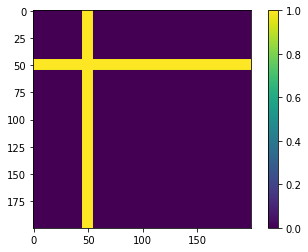

In [8]:
screen=np.zeros((200,200))
screen[:,45:55]=1
screen[45:55,:]=1
plt.imshow(screen)
plt.colorbar()
plt.show()

7.337029457092285


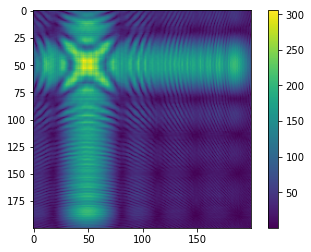

In [10]:
start=time.time()
output=rayprop(screen,1e5)
end=time.time()
print(end-start)
plt.imshow(np.abs(output))
plt.colorbar()
plt.show()